In [1]:
import pandas as pd
import csv

In [2]:
#Reading the data from docword.enron.txt file
with open('Input_data/docword.enron.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(" ") for line in stripped if line)
    with open('Input_file.csv', 'w') as out_file:
            writer = csv.writer(out_file)
            writer.writerows(lines)
    
  

In [3]:
#Storing the data in a dataframe
column_names=['DocId' , 'Word_Id' , 'Word_Count']
input_file = pd.read_csv("Input_file.csv", skiprows=6 , header=None, names=column_names ) 
df = pd.DataFrame(input_file)
df.head(5)

,DocId,Word_Id,Word_Count
0,1,118,1
1,1,285,1
2,1,1229,1
3,1,1688,1
4,1,2068,1


In [152]:
#Enter the 2 document IDs for which you want the similarity to be computer
docId_1 = int(input("Documnet Number 1?"))
docId_2 = int(input("Document Number 2?"))


#Get those documents from the entire set
doc1 = df.loc[df['DocId'] == docId_1]
doc2 = df.loc[df['DocId'] == docId_2]

#Calculation of their Jaccard Similarity as set intersection/set union
intersection =0
for rows1 in doc1.iterrows():
    for rows2 in doc2.iterrows():
        if rows1[1][1] == rows2[1][1] :
            intersection = intersection + 1
            


row_count1= doc1.shape[0]
row_count2= doc2.shape[0]

union = row_count1 +row_count2 - intersection
similarity = intersection / union
print("True Jaccard Similarity :", similarity )



Documnet Number 1?678
Document Number 2?524
11468
Jaccard Similarity : 0.006060606060606061


In [5]:
#datasketch library was used for all minhashing and lsh operations
#Info at http://ekzhu.com/datasketch/index.html
import sys
!{sys.executable} -m pip install datasketch -U

Requirement already up-to-date: datasketch in c:\users\abarat\appdata\local\continuum\anaconda3\lib\site-packages (1.4.10)


In [8]:
from hashlib import sha1
from datasketch import MinHash
from struct import *

In [157]:
#Estimating the Jaccard distance with the Minhash Library for the same 2 docs
data1 = doc1["Word_Id"]
data2 = doc2["Word_Id"]
perms =int(input("Enter the number of rows of Similarity matrix you want :::::::"))

m1, m2 = MinHash(num_perm= perms), MinHash(num_perm= perms)
for d in data1:
    m1.update(str(d).encode("utf-8"))
for d in data2:
    m2.update(str(d).encode("utf-8"))
estimated_jaccard= m1.jaccard(m2)
print("Estimated Jaccard for the same 2 docs ::::", estimated_jaccard )
print("Difference between estimated and actual Jaccard Similarity between these two documents :::: ", abs(estimated_jaccard- similarity))

Enter the number of rows of signature matrix you want :::::::256
Estimated Jaccard for the same 2 docs :::: 0.0078125
Difference between estimated and actual Jaccard Similarity between these two documents ::::  0.0017518939393939394


:::::::::: Demonstrating the effect of varying number of rows of Smilarity matrix on estimated Jaccard Similarity ::::::::::::
:::::::::: The same 2 documents are used for ease of comparison ::::::::::::::::::::::::::::
The variance in similarity is as follows ::::  [0.03125, 0.015625, 0.015625, 0.0078125]


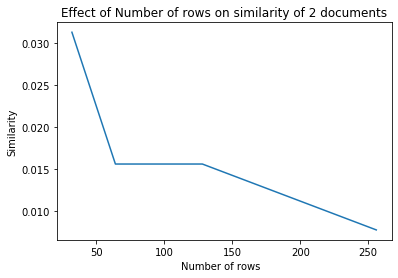

In [166]:
import matplotlib.pyplot as plt
print(":::::::::: Demonstrating the effect of varying number of rows of Smilarity matrix on estimated Jaccard Similarity ::::::::::::")
print(":::::::::: The same 2 documents are used for ease of comparison ::::::::::::::::::::::::::::")
data1 = doc1["Word_Id"]
data2 = doc2["Word_Id"]
perms = [32, 64, 128 , 256]

jaccard_sim = [None]*4
for x in range(0, 4):
    m1, m2 = MinHash(num_perm= perms[x]), MinHash(num_perm=perms[x])
    for d in data1:
        m1.update(str(d).encode("utf-8"))
    for d in data2:
        m2.update(str(d).encode("utf-8"))
    jaccard_sim[x]= m1.jaccard(m2)

print("The variance in similarity is as follows :::: " , jaccard_sim)
plt.plot(perms, jaccard_sim )
plt.xlabel('Number of rows  ')
plt.ylabel('Similarity')
plt.title('Effect of Number of rows on similarity of 2 documents')
plt.show()

In [131]:
#Calculating the Similarity matrix between 2 documents of user's choice
print("Enter the documents for which similarity matrix is required")
docId_1 = int(input("Documnet Number 1?"))
docId_2 = int(input("Document Number 2?"))


doc1 = df.loc[df['DocId'] == docId_1]
doc2 = df.loc[df['DocId'] == docId_2]

doc3 = pd.concat([doc1["Word_Id"], doc2["Word_Id"]])
doc3.drop_duplicates( keep= "first", inplace= True)


doc4 = pd.DataFrame(doc3)
doc4["Doc1"] = ""

for i in range(0, doc4.shape[0]):
    for j in range(0 ,doc1.shape[0]):
        if doc4.iloc[i, 0] == doc1.iloc[j, 1]:
            doc4.iloc[i, 1] = 1

for i in range(0, doc4.shape[0]):
    if doc4.iloc[i,1] != 1:
        doc4.iloc[i,1] = 0

doc4["Doc2"] = ""

for i in range(0, doc4.shape[0]):
    for j in range(0 ,doc2.shape[0]):
        if doc4.iloc[i, 0] == doc2.iloc[j, 1]:
            doc4.iloc[i, 2] = 1

for i in range(0, doc4.shape[0]):
    if doc4.iloc[i,2] != 1:
        doc4.iloc[i,2] = 0


print("Here we are considering every word as a shingle")
print(":::::::::::::::The Similarity Matrix is :::::::::::::::::::::::::::::")
print(doc4)

count =0;
for i in range(0, doc4.shape[0]):
    if doc4.iloc[i,1] == doc4.iloc[i,2]:
        count = count + 1

calculated_jaccard = count/doc4.shape[0]
print("Calculated Jaccard Similarity ::::::::::::" , calculated_jaccard)      

Enter the documents for which similarity matrix is required
Documnet Number 1?1
Document Number 2?2
Here we are considering every word as a shingle
:::::::::::::::The Similarity Matrix is :::::::::::::::::::::::::::::
     Word_Id  Doc1  Doc2
0        118     1     0
1        285     1     0
2       1229     1     0
3       1688     1     0
4       2068     1     1
5       5299     1     0
6       6941     1     0
7       7223     1     0
8       8904     1     0
9       9358     1     0
10      9667     1     0
11      9784     1     0
12     11099     1     0
13     11763     1     0
14     12224     1     0
15     12669     1     0
16     13631     1     1
17     14814     1     0
18     14816     1     0
19     17208     1     0
20     17872     1     0
21     18139     1     0
22     19190     1     0
23     20240     1     0
24     23028     1     1
25     23481     1     0
26     23893     1     0
27     25611     1     0
28     27283     1     0
29     27359     1     0
..     

In [164]:
#Clculating the Signature Matrix of the same 2 documents as above
rows = int(input("Enter the number of rows you want in signature matrix ::"))
signature_matrix = pd.DataFrame(index=range(0,rows), columns=['Doc1', 'Doc2'])

doc4["Element"]=""
for i in range(0,doc4.shape[0]):
    doc4.iloc[i,3]= i


for i in range(0, rows):
    hash = doc4.sample(doc4.shape[0])
    for j in range(0,hash.shape[0]):
        if hash.iloc[j,1] == 1 :
            signature_matrix.iloc[i, 0] = hash.iloc[j,3]
            break
            
    for j in range(0,hash.shape[0]):
        if hash.iloc[j,2] == 1 :
            signature_matrix.iloc[i, 1] = hash.iloc[j,3]
            break

print(":::::::::::::::::::: The Signature Matrix for the same 2 documents :::::::::::::::::::::::::::::")
print(signature_matrix)
    
count =0
for i in range(0, signature_matrix.shape[0]):
    if signature_matrix.iloc[i,0] == signature_matrix.iloc[i,1] :
        count = count +1

estimated_jaccard = count/signature_matrix.shape[0]
print("Estimated Jaccard Similarity ::::::::::::" , estimated_jaccard)

Enter the number of rows you want in signature matrix ::120
:::::::::::::::::::: The Signature Matrix for the same 2 documents :::::::::::::::::::::::::::::
     Doc1  Doc2
0      24    24
1      27    52
2      20   112
3      13    43
4       9   106
5      29    87
6      26    75
7      22    53
8      20   100
9       9    60
10     26   108
11      8    52
12     23    94
13      2    72
14     22    96
15      8    79
16     14    34
17     28    68
18      6   100
19     16   106
20     11    37
21     28   113
22     10    46
23     20    71
24      8    63
25     14    59
26     20    72
27     15    60
28     21    62
29     29    43
..    ...   ...
90     22    53
91     24    44
92     15    31
93     12    98
94     20    74
95     29    49
96     15    73
97      6    62
98     20    32
99     14    55
100    29    69
101    12   107
102    19    36
103     1    63
104    17    76
105     7    30
106    23    86
107    24   105
108    12   109
109     2    61
110    13  